# Illustration of MTF using bar patterns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import skimage
from matplotlib.gridspec import GridSpec

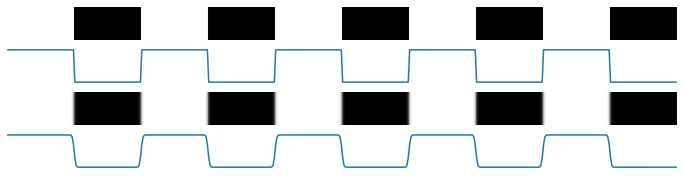

In [2]:
def rect(t, ampl):
    return ampl * signal.square(t)

t = np.linspace(0, 1, 500, endpoint=False)

square = signal.square(2 * np.pi * 5 * t)
grating = np.tile(square, (25, 1))

fig, axs = plt.subplots(4, 1, sharex=True, figsize=(12, 3))

axs[0].imshow(grating, cmap='gray')

axs[1].plot(grating[0])

sigma = 1
blurred = skimage.filters.gaussian(
    grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[2].imshow(blurred, cmap='gray')

axs[3].plot(blurred[0])

for ax in axs:
    ax.axis('off')

# plt.savefig('clear_bars.png', dpi=300)
plt.show()

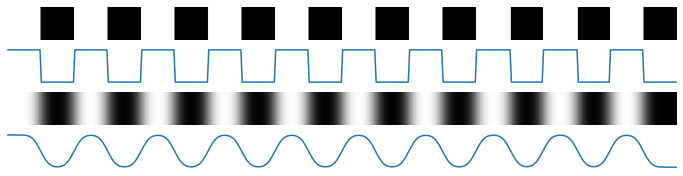

In [3]:
square = signal.square(2 * np.pi * 10 * t)
grating = np.tile(square, (25, 1))

fig, axs = plt.subplots(4, 1, sharex=True, figsize=(12, 3))

axs[0].imshow(grating, cmap='gray')

axs[1].plot(grating[0])

sigma = 5
blurred = skimage.filters.gaussian(
    grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[2].imshow(blurred, cmap='gray')

axs[3].plot(blurred[0])

for ax in axs:
    ax.axis('off')

# plt.savefig('blurred_bars.png', dpi=300)
plt.show()

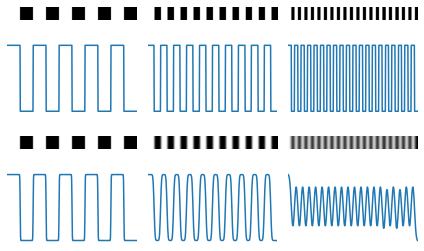

In [4]:
t = np.linspace(0, 1, 500, endpoint=False)
fig, axs = plt.subplots(4, 3, sharex=True)

square = signal.square(2 * np.pi * 5 * t)
sigma = 1

grating = np.tile(square, (50, 1))
axs[0][0].imshow(grating, cmap='gray')
axs[1][0].plot(grating[0])
blurred = skimage.filters.gaussian(grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[2][0].imshow(blurred, cmap='gray')
axs[3][0].plot(blurred[0])

square = signal.square(2 * np.pi * 10 * t)
sigma = 3

grating = np.tile(square, (50, 1))
axs[0][1].imshow(grating, cmap='gray')
axs[1][1].plot(grating[0])
blurred = skimage.filters.gaussian(grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[2][1].imshow(blurred, cmap='gray')
axs[3][1].plot(blurred[0])

square = signal.square(2 * np.pi * 20 * t)
sigma = 5

grating = np.tile(square, (50, 1))
axs[0][2].imshow(grating, cmap='gray')
axs[1][2].plot(grating[0])
blurred = skimage.filters.gaussian(grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[2][2].imshow(blurred, cmap='gray')
axs[3][2].plot(blurred[0])

for axes in axs:
    for ax in axes:
        ax.axis('off')

plt.tight_layout()
plt.show()

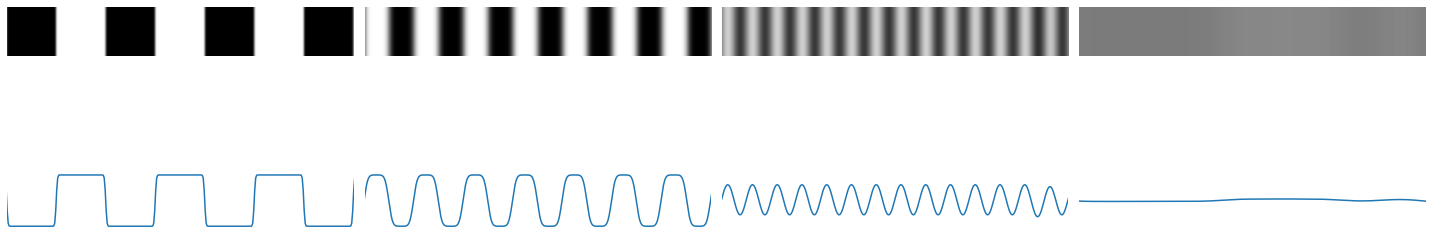

In [19]:
t = np.linspace(0, 1, 500, endpoint=False)

fig = plt.figure(figsize=(20, 5))

gs = GridSpec(2, 4, height_ratios=[5, 1], hspace=0)
axs = [fig.add_subplot(i) for i in gs]

square = signal.square(2 * np.pi * 5 * t)
sigma = 1
grating = np.tile(square, (50, 1))
blurred = skimage.filters.gaussian(grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[0].imshow(blurred, cmap='gray')
axs[4].plot(blurred[0])

square = signal.square(2 * np.pi * 10 * t)
sigma = 3
grating = np.tile(square, (50, 1))
blurred = skimage.filters.gaussian(grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[1].imshow(blurred, cmap='gray')
axs[5].plot(blurred[0])

square = signal.square(2 * np.pi * 20 * t)
sigma = 5
grating = np.tile(square, (50, 1))
blurred = skimage.filters.gaussian(grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[2].imshow(blurred, cmap='gray')
axs[6].plot(blurred[0])

square = signal.square(2 * np.pi * 50 * t)
sigma = 20
grating = np.tile(square, (50, 1))
blurred = skimage.filters.gaussian(grating, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
axs[3].imshow(blurred, cmap='gray')
axs[7].plot(blurred[0])

for ax in axs:
    ax.axis('off')
    ax.set_xlim(50, 400)

plt.tight_layout()
plt.savefig('mtf_bars_demo.png', transparent=True, dpi=300)
plt.show()

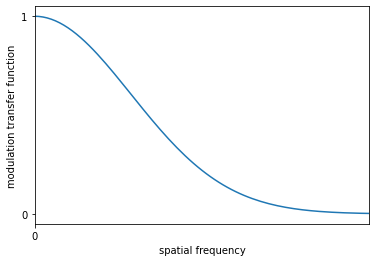

In [18]:
# stolen from bead-model.ipynb

def gaussian(x, sigma):
    return np.exp(-x**2/(2*sigma**2))

freqs = np.arange(-200, 200)

plt.plot(freqs, gaussian(freqs, 23))
# plt.axis('off')
plt.xlim(0, 80)
plt.gca().xaxis.set_ticks([0])
plt.gca().yaxis.set_ticks([0, 1])
plt.xlabel('spatial frequency')
plt.ylabel('modulation transfer function')
plt.savefig('mock_mtf.png', transparent=True, dpi=300)
plt.show()